In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
from sklearn.model_selection import cross_validate
import tensorflow.compat.v1 as tf
from sklearn import preprocessing


# Load libraries
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import LeaveOneOut
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
import pandas as pd
import numpy as np
import warnings
#
import skimage.transform as skTrans

warnings.filterwarnings("ignore")
print('Import completed')

C:\Users\layla\anaconda3\envs\project-fix\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Import completed


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [3]:
def nor(a):
    [number,x,y,z]=a.shape
    after=np.zeros(a.shape)
    for i in range(number):
        max1=np.max(a[i,:,:,:])
        print(i)
        print(max1)
        for j in range(x):
            for k in range(y):
                for l in range(z):
                    after[i,j,k,l]=a[i,j,k,l]/max1
    return after

In [4]:
import math
def padding(a,c):
    [number,x,y,z]=a.shape
    a0=a
    x_z=math.floor((c-x)/2)
    y_z=math.floor((c-y)/2)
    z_z=math.floor((c-z)/2)
    for i in np.arange(x,x+x_z*2,2):
        a0=np.insert(a0,[0,i],0,1)
        print('x',i)
    for j in np.arange(y,y+y_z*2,2):
        a0=np.insert(a0,[0,j],0,2)
        print('y',j)
    for k in np.arange(z,z+z_z*2,2):
        a0=np.insert(a0,[0,k],0,3)
        print('z',k)
    if a0.shape[1]<c:
        a0=np.insert(a0,0,0,1)
    if a0.shape[2]<c:
        a0=np.insert(a0,0,0,2)
    if a0.shape[3]<c:
        a0=np.insert(a0,0,0,3)
    return a0

In [5]:
def myreadfile2(dirr):
    os.chdir(dirr)
    # 查看當前工作目錄
    cwd = os.getcwd()

    number = 0

    flag = True
    imgs_array = np.array([])
    for root, dirs, files in os.walk(cwd):    
        for file in files:
            if file.endswith(".nii"):
                #print(os.path.join(root, file))
                img = nib.load(os.path.join(root, file))
                img_array = img.get_fdata()
                #
                img_array = skTrans.resize(img_array, (64,64,64), order=1, preserve_range=True)
                img_array = img_array.reshape(-1,64,64,64)
                number += 1
                if flag == True:
                    imgs_array = img_array

                else:
                    imgs_array = np.concatenate((imgs_array, img_array), axis=0)

                flag = False
    print('number of subjects =', number)
    print('arrray shape =', imgs_array.shape)
    return number, imgs_array

In [6]:
dirr = r"C:\Users\layla\Desktop\大三上\專題\B15A_BD\B15ABD-bipolor"
a_number, BD = myreadfile2(dirr)
BD.shape
dirr = r"C:\Users\layla\Desktop\大三上\專題\F18B_HC\F18BHC-health"
b_number, HC = myreadfile2(dirr)
HC.shape
#dirr = r"C:\Users\layla\Desktop\大三上\專題\G11A_HC\G11AHC-nii"
#b_number, G11A = myreadfile2(dirr)
#G11A.shape

number of subjects = 62
arrray shape = (62, 64, 64, 64)
number of subjects = 62
arrray shape = (62, 64, 64, 64)


(62, 64, 64, 64)

In [7]:
norb=nor(HC)
nora=nor(BD)
#norb=nor(G11A)

0
0.9146487100006124
1
0.8920411623773485
2
0.9135441950843475
3
0.9665462680579902
4
0.904063152881796
5
0.8637745715338021
6
0.8978800451403766
7
0.9266111959894314
8
0.8540348097574898
9
0.835879693243651
10
0.8704183592225591
11
0.8473058742601772
12
0.9264145660883522
13
0.9351697239383964
14
0.9383923607569987
15
0.8169861360156029
16
0.8846738780972114
17
0.9408347895917878
18
0.898421712935849
19
0.9217975178802853
20
0.914317645775669
21
0.9174349112861375
22
0.918249495734969
23
0.9289268843783869
24
0.9057882662891088
25
0.8753326564368519
26
0.9517510818454854
27
0.835018883233266
28
0.945774464839364
29
0.9343189689829596
30
0.9451241468019386
31
0.8838547542593933
32
0.9485155710175495
33
0.866234031524859
34
0.8756401420366008
35
0.861697175530123
36
0.9328025825706849
37
0.9296082571699968
38
0.8751395420741138
39
0.8886313610828593
40
0.9393360774024321
41
0.9028525254427994
42
0.92821025342956
43
0.9344536788307589
44
0.9257710570512043
45
0.7991088774112527
46
0.8915

In [8]:
b=padding(norb,64)
a=padding(nora,64)
#b=padding(norb,64)

In [9]:
total = np.concatenate((b,a), axis=0)#陣列合併
total.shape

(124, 64, 64, 64)

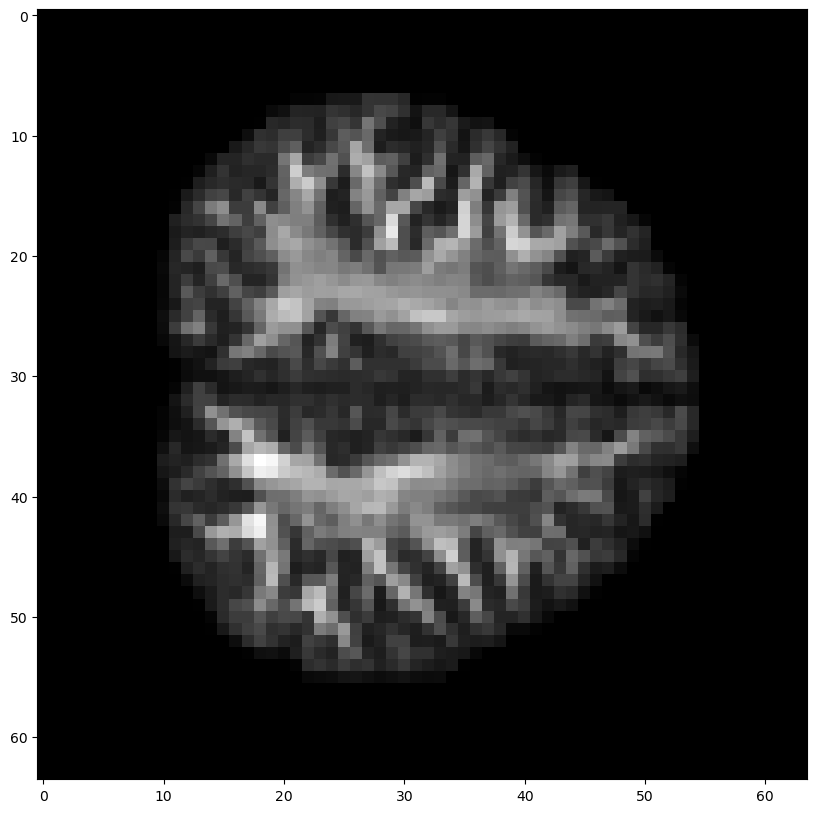

In [10]:
plt.figure(figsize=(10, 10))#figsize：宽和高
plt.imshow(total[26,:,:,40])
plt.gray()

In [11]:
#gpu
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [12]:
from tensorflow.keras.layers import Input, Dense, Conv3D, Conv3DTranspose, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import skimage.transform as skTrans

input_img = Input(shape=(64,64,64,1))  # adapt this if using `channels_first` image data format


#ˊ64,64,64
x = Conv3D(32, (3, 3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal')(input_img)
x = Conv3D(32, (3, 3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal')(x)
x = Conv3D(64, (3, 3, 3), activation='relu', strides=(2,2,2), padding='same', kernel_initializer = 'he_normal')(x)
x = Conv3D(128, (3, 3, 3), activation='relu', strides=(2,2,2), padding='same', kernel_initializer = 'he_normal')(x)
x = Conv3D(256, (3, 3, 3), activation='relu', strides=(2,2,2), padding='same', kernel_initializer = 'he_normal')(x)
encoded = Conv3D(128,(3, 3, 3),activation='relu', padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv3D(256, (3, 3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal')(encoded)
x = Conv3DTranspose(128,(3, 3, 3) , activation='relu', strides=(2,2,2), padding='same', kernel_initializer = 'he_normal')(x)
x = Conv3DTranspose(64,(3, 3, 3) , activation='relu', strides=(2,2,2), padding='same', kernel_initializer = 'he_normal')(x)
x = Conv3DTranspose(32, (3, 3, 3), activation='relu', strides=(2,2,2), padding='same', kernel_initializer = 'he_normal')(x)
x = Conv3D(32, (3, 3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal')(x)
decoded=Conv3D(1, (3,3,3),activation='relu', padding='same',kernel_initializer = 'he_normal')(x)
autoencoder = Model(input_img, decoded)
encoder=Model(input_img, encoded)
opt3=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9)
#sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
                                  
autoencoder.compile(optimizer=opt3, loss='mean_squared_error')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 64, 64, 64, 32)    896       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 64, 64, 64, 32)    27680     
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 32, 32, 32, 64)    55360     
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 16, 16, 16, 128)   221312    
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 8, 8, 8, 256)      884992    
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 8, 8, 8, 128)      884864

In [13]:
#from tensorflow.keras.models import load_model
#autoencoder=load_model(r"C:\Users\layla\Desktop\大三上\專題\auto_adam_bi.h5")

X_train = total.reshape(124,64,64,64,1)

In [14]:
X_train = total.reshape(124,64,64,64,1)
#pass
autoencoder.fit(X_train, X_train,
                epochs=2,
                batch_size=1,
                shuffle=True,)
#               validation_data=(X_test, X_test))

Epoch 1/2
124/124 [==============================] - 346s 3s/step - loss: 0.0045
Epoch 2/2
124/124 [==============================] - 340s 3s/step - loss: 0.0022


In [15]:
autoencoder.save(r'C:\Users\layla\Desktop\大三上\專題\auto_adam_bi_XGB.h5')

In [16]:
decoded_imgs = autoencoder.predict(X_train[84:93,])

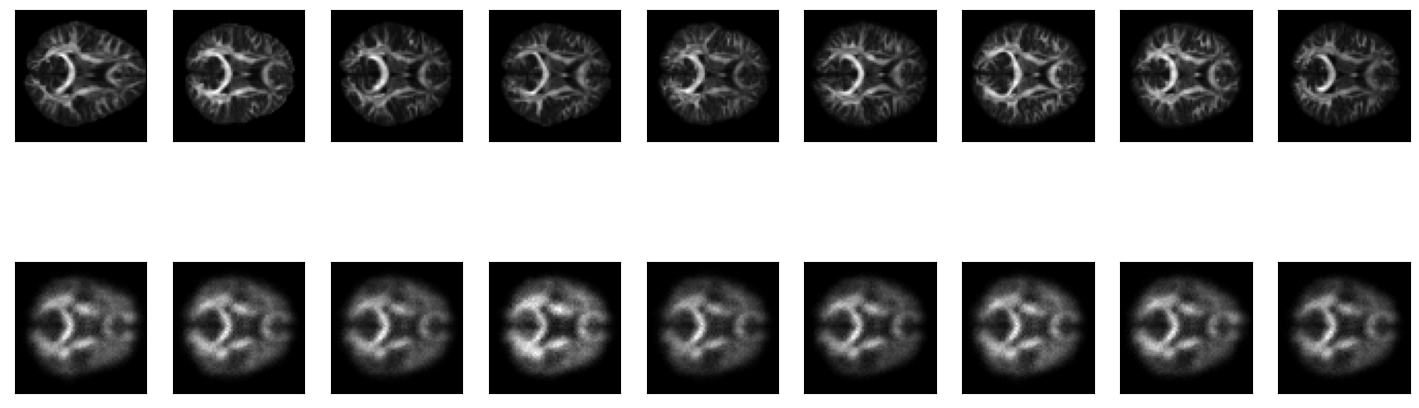

In [17]:
n = 9
plt.figure(figsize=(18, 6))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(total[i,:,:,30])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    prediction = decoded_imgs.reshape(-1,64,64,64)
    plt.imshow(prediction[i,:,:,30])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#plt.savefig('/home/user/Desktop/hsinan/mfALFF.png')
plt.show()

In [18]:
encoder = Model(input_img, encoded)
#encoded_imgs = encoder.predict(X_train[0:6])

In [19]:
encoded_a = encoder.predict(a.reshape(-1,64,64,64,1))
encoded_b = encoder.predict(b.reshape(-1,64,64,64,1))
print(encoded_a.shape)
print(encoded_b.shape)

(62, 8, 8, 8, 128)
(62, 8, 8, 8, 128)


In [20]:
flat_a = encoded_a.reshape(-1,8*8*8*128)#(-1,64,64,64,1)
flat_b = encoded_b.reshape(-1,8*8*8*128)#not fix yet
print(flat_a.shape)
print(flat_b.shape)

(62, 65536)
(62, 65536)


In [21]:
'''encoded_A = encoder.predict(nora.reshape(-1,64,64,64,1))
encoded_B = encoder.predict(norb.reshape(-1,64,64,64,1))
print(encoded_A.shape)
print(encoded_B.shape)'''

'encoded_A = encoder.predict(nora.reshape(-1,64,64,64,1))\nencoded_B = encoder.predict(norb.reshape(-1,64,64,64,1))\nprint(encoded_A.shape)\nprint(encoded_B.shape)'

In [22]:
'''flat_A = encoded_A.reshape(-1,16*16*16*64)
flat_B = encoded_B.reshape(-1,16*16*16*64)#not fix yet
print(flat_A.shape)
print(flat_B.shape)'''

'flat_A = encoded_A.reshape(-1,16*16*16*64)\nflat_B = encoded_B.reshape(-1,16*16*16*64)#not fix yet\nprint(flat_A.shape)\nprint(flat_B.shape)'

In [23]:
x=np.concatenate((flat_a, flat_b),axis=0)
y=np.concatenate(([0]*62,([1]*62)),axis=0)

In [24]:
#0,1
models=[]
loo=LeaveOneOut()
total_accuracy=0
total_pred=[]
y_score1=[]
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('CART', DecisionTreeClassifier(max_depth=2)))
#models.append(('NB', GaussianNB()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('SVM', SVC()))
#models.append(('MLP', MLPClassifier(verbose=True)))
#models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier(n_jobs=7)))
              
for name, model in models:
    total_accuracy=0
    total_pred=[]
    print(name,':')
    for train_index, test_index in loo.split(x):
            #print("TRAIN:", train_index, "TEST:", test_index)
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            modelfit=model.fit(x_train,y_train)
            y_pred=modelfit.predict(x_test)
            y_score1.extend(model.predict_proba(x_test)[:,1])
            y_score=np.array(y_score1)
            total_accuracy=total_accuracy+accuracy_score(y_test,y_pred)
            total_pred.extend(y_pred)
            total_pred2=np.array(total_pred)
            print('run')
    print(total_accuracy/loo.get_n_splits(x))
    print(confusion_matrix(y, total_pred2))
    print(classification_report(y, total_pred2))
   # print('Kappa=%0.2f' % cohen_kappa_score(y, total_pred2))
    

XGB :
[13:55:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[13:55:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[13:55:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[

run
[14:00:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[14:00:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[14:00:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[14

run
[14:04:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[14:05:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[14:05:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[14

run
[14:09:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[14:09:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[14:09:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[14

run
[14:14:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[14:14:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[14:14:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
run
[14

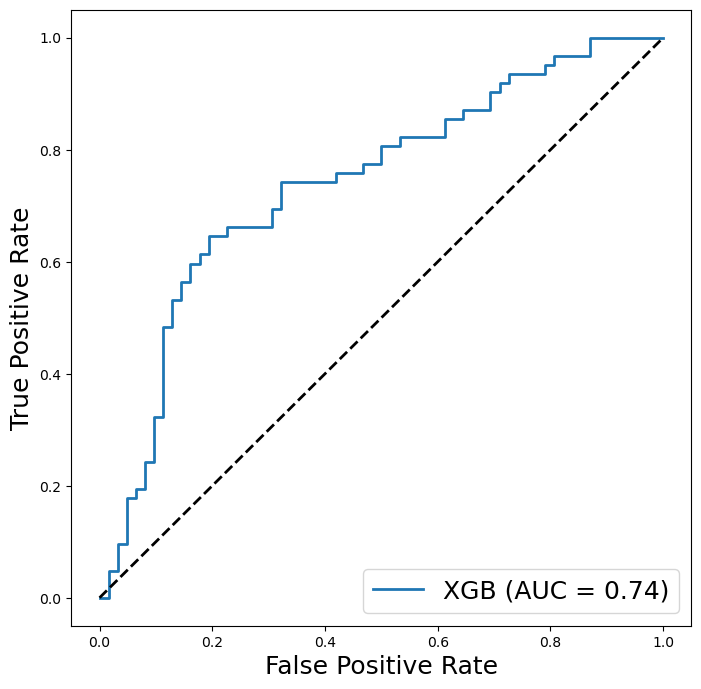

In [29]:
#0,1
fpr, tpr, thresholds = roc_curve(y, y_score)
auc =  roc_auc_score(y, y_score)
#fpr2, tpr2, thresholds2 = roc_curve(y_validation2, y_score2)
#GFAauc2 =  roc_auc_score(y_validation2, y_score2)
fig = plt.figure(figsize=(8,8))
plt.plot(fpr,tpr, lw=2, label='XGB'+' (AUC = %0.2f)' % auc)
#plt.plot(GFAfpr2,GFAtpr2, lw=2, label='GFA second half'+' (AUC = %0.2f)' % GFAauc2)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
#plt.title('Receiver operating characteristic curve')
plt.legend(loc=4,fontsize=18)
plt.show()
#os.chdir('/home/user/Desktop/MDD_GQI_new/curve')
#plt.savefig('gfa_

In [26]:
fpr

array([0.        , 0.01612903, 0.01612903, 0.01612903, 0.03225806,
       0.03225806, 0.0483871 , 0.0483871 , 0.06451613, 0.06451613,
       0.08064516, 0.08064516, 0.09677419, 0.09677419, 0.11290323,
       0.11290323, 0.12903226, 0.12903226, 0.14516129, 0.14516129,
       0.16129032, 0.16129032, 0.17741935, 0.17741935, 0.19354839,
       0.19354839, 0.22580645, 0.22580645, 0.30645161, 0.30645161,
       0.32258065, 0.32258065, 0.41935484, 0.41935484, 0.46774194,
       0.46774194, 0.5       , 0.5       , 0.53225806, 0.53225806,
       0.61290323, 0.61290323, 0.64516129, 0.64516129, 0.69354839,
       0.69354839, 0.70967742, 0.70967742, 0.72580645, 0.72580645,
       0.79032258, 0.79032258, 0.80645161, 0.80645161, 0.87096774,
       0.87096774, 1.        ])

In [27]:
tpr

array([0.        , 0.        , 0.01612903, 0.0483871 , 0.0483871 ,
       0.09677419, 0.09677419, 0.17741935, 0.17741935, 0.19354839,
       0.19354839, 0.24193548, 0.24193548, 0.32258065, 0.32258065,
       0.48387097, 0.48387097, 0.53225806, 0.53225806, 0.56451613,
       0.56451613, 0.59677419, 0.59677419, 0.61290323, 0.61290323,
       0.64516129, 0.64516129, 0.66129032, 0.66129032, 0.69354839,
       0.69354839, 0.74193548, 0.74193548, 0.75806452, 0.75806452,
       0.77419355, 0.77419355, 0.80645161, 0.80645161, 0.82258065,
       0.82258065, 0.85483871, 0.85483871, 0.87096774, 0.87096774,
       0.90322581, 0.90322581, 0.91935484, 0.91935484, 0.93548387,
       0.93548387, 0.9516129 , 0.9516129 , 0.96774194, 0.96774194,
       1.        , 1.        ])

In [28]:
y_score

array([0.11074987, 0.0612499 , 0.47540852, 0.43355924, 0.0453409 ,
       0.367119  , 0.05864163, 0.02189351, 0.293808  , 0.21887083,
       0.16430616, 0.37736896, 0.15253416, 0.53731906, 0.32811457,
       0.20976572, 0.157575  , 0.0218685 , 0.53056437, 0.08731536,
       0.489157  , 0.05958346, 0.18138623, 0.15765952, 0.11669485,
       0.00979015, 0.63060766, 0.5638249 , 0.21804513, 0.20776145,
       0.4903035 , 0.04188991, 0.98376024, 0.8971388 , 0.88140655,
       0.64748406, 0.94271255, 0.38089293, 0.00285065, 0.38608423,
       0.33650592, 0.09623389, 0.24120352, 0.2043942 , 0.2895637 ,
       0.03747547, 0.9574633 , 0.06123482, 0.51189077, 0.0765999 ,
       0.38509396, 0.12361941, 0.36729297, 0.6796676 , 0.6704609 ,
       0.01459165, 0.85166705, 0.31665146, 0.10457149, 0.490157  ,
       0.8943157 , 0.2436383 , 0.16315886, 0.71247137, 0.8488512 ,
       0.9832985 , 0.27751756, 0.5547724 , 0.07895415, 0.13689733,
       0.8983286 , 0.11144958, 0.87807816, 0.06946947, 0.39807